In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet
import os

In [2]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [4]:
det = chardet.detect(open('../../_data/data_dengue_peru.csv', 'rb').read())
charenc = det['encoding']

In [7]:
main_data = pd.read_csv('../../_data/data_dengue_peru.csv', encoding=charenc, low_memory=False)

In [8]:
main_data["Ubigeo_String"] = main_data["Ubigeo"].astype(str)

main_data["Ubigeo_Largo"] = main_data["Ubigeo_String"].str.len()

In [9]:
df5 = main_data[main_data["Ubigeo_Largo"] == 5]
df5["Ubigeo_String"] = df5["Ubigeo_String"].str.zfill(6)

C:\Users\MSI-NB\AppData\Local\Temp\ipykernel_10544\3164714844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["Ubigeo_String"] = df5["Ubigeo_String"].str.zfill(6)


In [10]:
df6 = main_data[main_data["Ubigeo_Largo"] == 6]

In [11]:
new_data = pd.concat([df5, df6])

In [12]:
new_data["Ubigeo_Departamento"] = new_data["Ubigeo_String"].str[0:2]
new_data["Ubigeo_Provincia"] = new_data["Ubigeo_String"].str[0:4]

In [14]:
maps = gpd.read_file(r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')

In [15]:
maps = maps[['UBIGEO', 'geometry', 'NOMBDEP']]
maps['UBIGEO'] = maps['UBIGEO'].astype(int)

In [16]:
new_data.Casos = new_data.Casos.fillna(0).replace(',', '', regex=True).astype(int)
new_data.rename(columns={"Ubigeo": "UBIGEO"}, inplace=True)

In [17]:
ds = pd.merge(maps, new_data, how="outer", on="UBIGEO")

ds.Año = ds.Año.fillna(2021).astype(int)

filtered_ds = ds[ds["Año"] == 2021]

#filtered_ds.Casos = filtered_ds.Casos.replace(0, np.nan)

In [19]:
filtered_ds

,UBIGEO,geometry,NOMBDEP,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Casos,Ubigeo_String,Ubigeo_Largo,Ubigeo_Departamento,Ubigeo_Provincia
0,60504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322...",CAJAMARCA,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,61105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...",CAJAMARCA,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...",CAJAMARCA,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...",CAJAMARCA,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...",CAJAMARCA,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173432,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",JUNIN,2021,15.0,Dengue,JUNIN,MAZAMARI,SATIPO,6.0,120604,6.0,12,1206
173433,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",JUNIN,2021,16.0,Dengue,JUNIN,MAZAMARI,SATIPO,6.0,120604,6.0,12,1206
173434,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",JUNIN,2021,20.0,Dengue,JUNIN,MAZAMARI,SATIPO,7.0,120604,6.0,12,1206
173435,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",JUNIN,2021,21.0,Dengue,JUNIN,MAZAMARI,SATIPO,5.0,120604,6.0,12,1206


<Axes: >

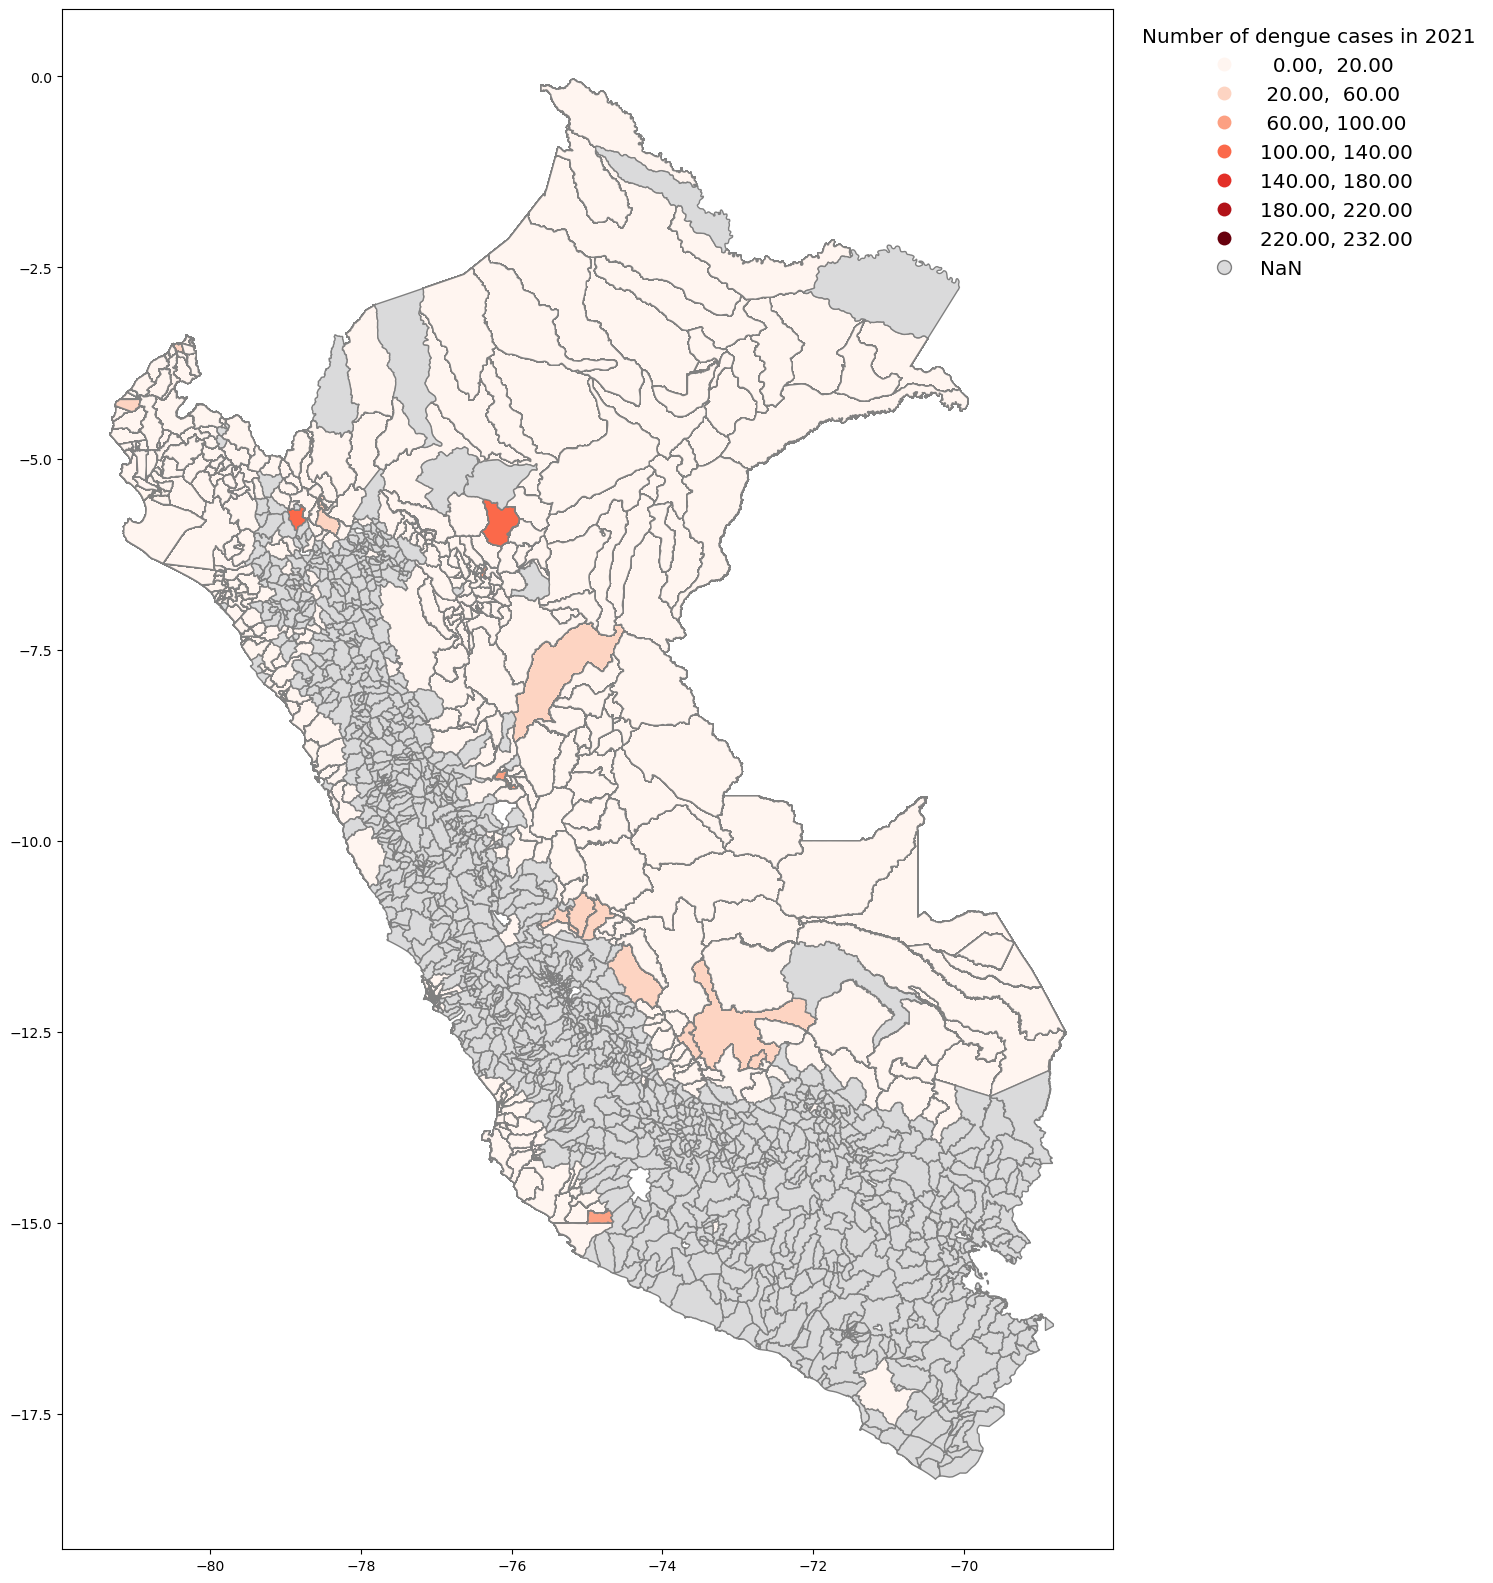

In [21]:
fig, ax = plt.subplots(figsize=(20, 20))
filtered_ds.plot(ax=ax,
                  column='Casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          legend = True,  
          scheme = "User_Defined", 
          missing_kwds= dict(color = "#DADADB",), 
          classification_kwds = dict( bins = [ 20, 60, 100, 140, 180, 220] ), 
          legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Number of dengue cases in 2021", 
                            title_fontsize = 'x-large', 
                            frameon= False ) )  